In [2]:
import pandas as pd 
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# read csv file 
ml_data = pd.read_csv ('../Data/ML_data.csv')
ml_data

,shire,rainfall.yearToDate,tos_field_ph,Straw Yield /Ha Cereal Crop Average over 5 years
0,albany,10.733333,5.750000,2.53
1,beverley,1.300000,7.500000,2.14
2,bruce rock,16.933333,6.000000,1.04
3,carnamah,0.200000,6.500000,0.85
4,coorow,6.700000,7.000000,0.74
5,dandaragan,3.600000,6.000000,2.98
6,dumbleyung,2.400000,8.000000,1.60
7,gingin,0.400000,6.500000,2.28
8,irwin,0.000000,7.000000,1.98
9,jerramungup,19.666667,6.750000,1.84


In [4]:
# check for any correlations
ml_data.corr()

,rainfall.yearToDate,tos_field_ph,Straw Yield /Ha Cereal Crop Average over 5 years
rainfall.yearToDate,1.000000,0.347535,-0.602226
tos_field_ph,0.347535,1.000000,-0.372324
Straw Yield /Ha Cereal Crop Average over 5 years,-0.602226,-0.372324,1.000000


In [5]:
X = ml_data[[
    "rainfall.yearToDate", 
    "tos_field_ph", 
    
]]

y = ml_data["Straw Yield /Ha Cereal Crop Average over 5 years"].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (26, 2) (26, 1)


In [6]:
data = X.copy()

data_encoded = pd.get_dummies(ml_data, columns=["shire"])
data_encoded

,rainfall.yearToDate,tos_field_ph,Straw Yield /Ha Cereal Crop Average over 5 years,shire_albany,shire_beverley,shire_bruce rock,shire_carnamah,shire_coorow,shire_dandaragan,shire_dumbleyung,...,shire_mukinbudin,shire_narembeen,shire_northam,shire_northampton,shire_perenjori,shire_ravensthorpe,shire_three springs,shire_west arthur,shire_westonia,shire_yilgarn
0,10.733333,5.750000,2.53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.300000,7.500000,2.14,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.933333,6.000000,1.04,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.200000,6.500000,0.85,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.700000,7.000000,0.74,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.600000,6.000000,2.98,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2.400000,8.000000,1.60,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0.400000,6.500000,2.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000000,7.000000,1.98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19.666667,6.750000,1.84,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Scaling and Normalization

In [7]:
from sklearn.model_selection import train_test_split

#X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

,rainfall.yearToDate,tos_field_ph
1,1.300000,7.500
23,0.700000,5.000
5,3.600000,6.000
2,16.933333,6.000
12,2.300000,6.500
15,29.300000,7.750
3,0.200000,6.500
4,6.700000,7.000
21,24.342857,6.625
17,41.400000,9.000


Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Train the model

In [11]:
# train the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
model.score(X_test_scaled, y_test_scaled)

0.3336948480371167

In [12]:
# create a shire encoder (Encode categorical features as a one-hot numeric array)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(ml_data[[
    "shire"
]])

OneHotEncoder()

In [14]:
# create a prediction function 
def predict(model, X_scaler, y_scaler, user_inputs):
    # get the user input data 
    
    soilpH = user_inputs["tos_field_ph"]
    rain = user_inputs["rainfall.yearToDate"]
    
    # store shire names into a df 
    rain_input_df = pd.DataFrame({
        "rainfall.yearToDate": [rain]
    })

      
    # store soil pH and rain into df 
    input_df = pd.DataFrame({
        "tos_field_ph": [soilpH],
        "rainfall.yearToDate": [rain]
    })

    # scale the X input df 
    X_scaled = X_scaler.transform(input_df)

    # obtain prediction (y) 
    prediction_scaled = model.predict(X_scaled)
    
    # scale prediction to human readable terms i.e. celcius 
    prediction = y_scaler.inverse_transform(prediction_scaled)
    return prediction 

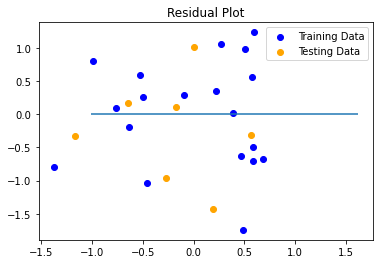

In [15]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test_scaled)
MSE = mean_absolute_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.618172470947665, R2: 0.3336948480371167


In [17]:
# test a single prediction 
user_inputs = {
    "tos_field_ph": 6, 
    "rainfall.yearToDate": 5   
}
print(f"predicted straw yield per hectar is: {predict(model, X_scaler, y_scaler, user_inputs)[0][0].round(2)}")

predicted straw yield per hectar is: 1.67


C:\Users\valen\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [18]:
#save model 
import joblib 
joblib.dump(model, "../app/static/py/model.sav")
joblib.dump(y_scaler, "../app/static/py/y_scaler.sav")
joblib.dump(X_scaler, "../app/static/py/x_scaler.sav")
joblib.dump(encoder, "../app/static/py/encoder.sav")

['../app/static/py/encoder.sav']